# Parameters and Searching 

## Build a Basic Decision Tree Model for Predicting Spam

1. Download the spam.csv file
2. Load the data into a dataframe pandas
3. Process by dealing with missing values and non-numerical values
4. Split into target and features
5. Split into training and testing data
6. Train DecisionTreeClassifier model on the training data
7. Find score of DTC model on the testing data


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

spam_df = pd.read_csv('./spam-data.csv')

In [2]:
spam_df['capital_run_length_longest'] = spam_df['capital_run_length_total']
spam_df['capital_run_length_total'] = spam_df['Unnamed: 56']

spam_df.drop(columns = ['Unnamed: 56'], inplace = True)

In [3]:
print(spam_df.columns.values)

['word_freq_make' 'word_freq_address' 'word_freq_all' 'word_freq_3d'
 'word_freq_our' 'word_freq_over' 'word_freq_remove' 'word_freq_internet'
 'word_freq_order' 'word_freq_mail' 'word_freq_receive' 'word_freq_will'
 'word_freq_people' 'word_freq_report' 'word_freq_addresses'
 'word_freq_free' 'word_freq_business' 'word_freq_email' 'word_freq_you'
 'word_freq_credit' 'word_freq_your' 'word_freq_font' 'word_freq_000'
 'word_freq_money' 'word_freq_hp' 'word_freq_hpl' 'word_freq_george'
 'word_freq_650' 'word_freq_lab' 'word_freq_labs' 'word_freq_telnet'
 'word_freq_857' 'word_freq_data' 'word_freq_415' 'word_freq_85'
 'word_freq_technology' 'word_freq_1999' 'word_freq_parts' 'word_freq_pm'
 'word_freq_direct' 'word_freq_cs' 'word_freq_meeting'
 'word_freq_original' 'word_freq_project' 'word_freq_re' 'word_freq_edu'
 'word_freq_table' 'word_freq_conference' 'char_freq_:' 'char_freq_('
 'char_freq_(.1' 'char_freq_!' 'char_freq_$' 'char_freq_#'
 'capital_run_length_average' 'capital_run_len

In [4]:
print('\033[4m%-30s | %s\033[0m' % ('Column', 'Missing Values'))
for c in spam_df.columns:
    s = sum(spam_df[c].isna())
    if (s > 0):
        print('%-30s | %d' % (c, s))

Column                         | Missing Values


In [5]:
y = spam_df['spam']

X = spam_df.drop(columns = ['spam'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 39, test_size = .3)

In [7]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
DTC.score(X_test, y_test)

0.9044170890658942

In [20]:
spam_df['spam'].mean()

0.39404477287546186

## Adjusting Parameters

Now we talk about some different parameters a Decision Tree classifier can have, and we write a function that tells us how score changes with those parameters. 

In [9]:
DTC2 = DecisionTreeClassifier(random_state = 39, max_depth = 4)
DTC2.fit(X_train, y_train)
DTC2.score(X_test, y_test)

0.8957277335264301

In [10]:
def depth_to_score(n, random = 39):
    DTC_test = DecisionTreeClassifier(random_state = random, max_depth = n)
    DTC_test.fit(X_train, y_train)
    return DTC_test.score(X_test, y_test)

In [11]:
nums = range(1, 101)
score = [depth_to_score(n) for n in nums]

In [12]:
score_df = pd.DataFrame({"depth": nums, "score": score})

In [13]:
score_df.head()

,depth,score
0,1,0.778421
1,2,0.849385
2,3,0.854453
3,4,0.895728
4,5,0.906589


## We do the same thing, but with GridSearchCV

In [14]:
parameters = {'criterion': ('gini', 'entropy', 'log_loss'), 'max_depth': nums}
my_DTC = DecisionTreeClassifier()

clf = GridSearchCV(my_DTC, parameters)

In [15]:
clf.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': range(1, 101)})

In [16]:
results_df = pd.DataFrame(clf.cv_results_)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008689,0.002332,0.001756,0.000471,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.768730,0.804348,0.806522,0.819565,0.676087,0.775050,0.052276,298
1,0.010841,0.000575,0.001490,0.000181,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.850163,0.869565,0.882609,0.888043,0.714130,0.840902,0.064715,295
2,0.013699,0.000256,0.001453,0.000039,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.855592,0.884783,0.897826,0.915217,0.794565,0.869597,0.042272,292
3,0.016716,0.000074,0.001388,0.000020,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.894680,0.898913,0.907609,0.906522,0.801087,0.881762,0.040622,254
4,0.019382,0.000353,0.001393,0.000047,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.903366,0.906522,0.906522,0.923913,0.810870,0.890238,0.040339,198


<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

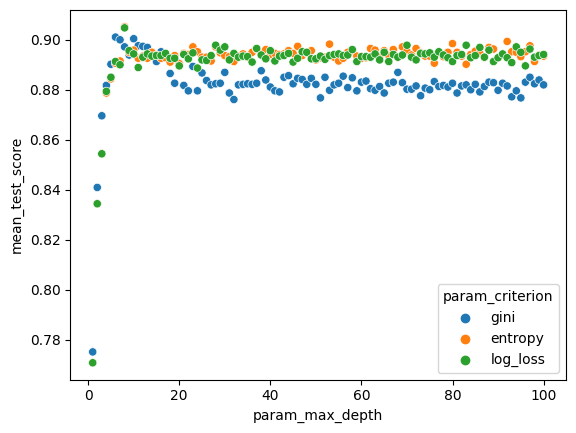

In [17]:
sns.scatterplot(results_df, x = 'param_max_depth', y = 'mean_test_score', hue = 'param_criterion')

<AxesSubplot:xlabel='param_max_depth', ylabel='mean_fit_time'>

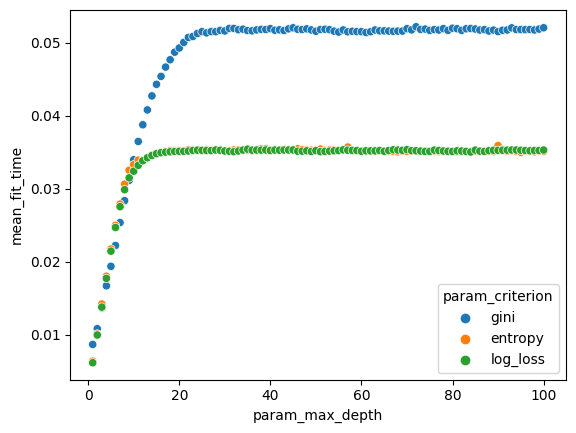

In [18]:
sns.scatterplot(results_df, x = 'param_max_depth', y = 'mean_fit_time', hue = 'param_criterion')

## Random Forests

Now we introduce Random Forests, which are like groups of Decision Trees trained on subsets of the data. 

1. Split training data into random samples (smaller subsets of original)
2. Give each sample to train a different decision tree
3. to predict, take the majority vote of the decision trained decisions trees

## Ensemble Classifiers 

- uses a 'team' of classifiers combine individual predictions (in some way) to make the final production

In [19]:
spam_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_(.1,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_total,spam,capital_run_length_longest
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,278,1,61
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,1028,1,101
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,2259,1,485
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,191,1,40
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,191,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,88,0,3
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,14,0,4
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,118,0,6
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,78,0,5
